In [1]:
# Importing Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#
# Importing CSV File
data = pd.read_csv("/Users/saiffallah.GREENTNS/Desktop/titanic.csv",sep=',')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#
# Replace the missing values of the column "Age" with:
data['Age'].fillna(data['Age'].mean(),inplace=True)

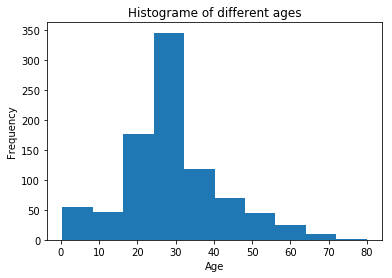

In [4]:
#
# Histogram of different Age
plt.title("Histograme of different ages")
plt.xlabel("Age")
data['Age'].plot.hist()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

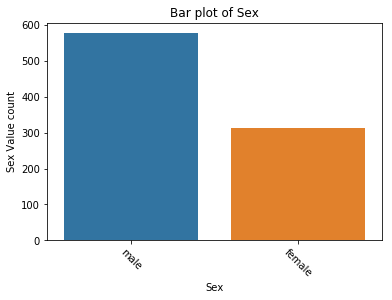

In [5]:
#
# Histogram "Bar plot of Sex"
sns.countplot(x='Sex',data=data)
plt.ylabel("Sex Value count")
plt.title("Bar plot of Sex")
plt.xticks(rotation=-45)

([<matplotlib.axis.XTick at 0x1ec36087160>,
 <a list of 2 Text xticklabel objects>)

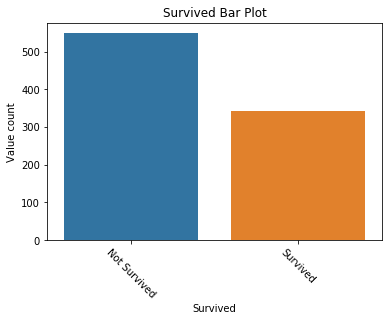

In [6]:
#
# Histogram "Survived Bar Plot"
sns.countplot(x='Survived',data=data)
plt.title("Survived Bar Plot")
plt.ylabel("Value count")
plt.xticks([0, 1], ['Not Survived', 'Survived'],rotation=-45)

([<matplotlib.axis.XTick at 0x1ec360d1550>,
 <a list of 3 Text xticklabel objects>)

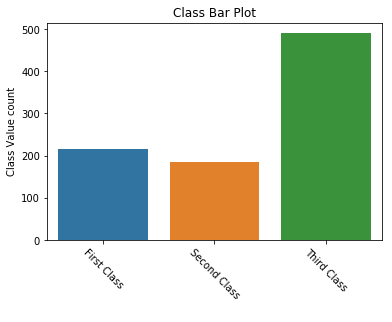

In [7]:
#
# Class Bar Plot
sns.countplot(x="Pclass", data=data)
plt.ylabel("Class Value count")
plt.xlabel(" ")
plt.title("Class Bar Plot")
plt.xticks([0, 1,2], ['First Class', 'Second Class', 'Third Class'],rotation=-45)

([<matplotlib.axis.XTick at 0x1ec3610efd0>,
 <a list of 3 Text xticklabel objects>)

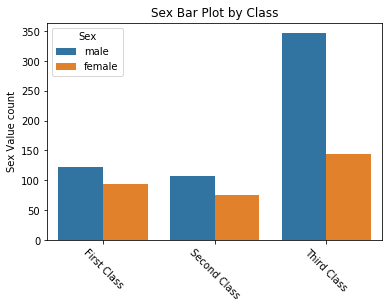

In [8]:
#
#
sns.countplot(x="Pclass", hue="Sex", data=data)
plt.title("Sex Bar Plot by Class")
plt.xlabel("")
plt.ylabel("Sex Value count")
plt.xticks([0, 1,2], ['First Class', 'Second Class', 'Third Class'],rotation=-45)

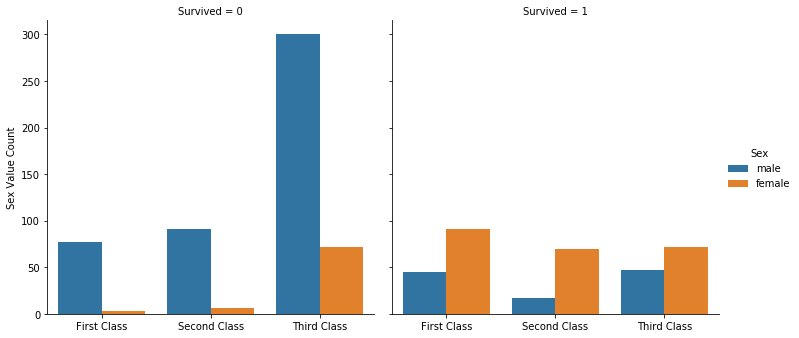

In [9]:
#
#
g=sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=data, kind="count",
                height=5, aspect=1);
(g.set_axis_labels("","Sex Value Count")
.set_xticklabels(["First Class", "Second Class", "Third Class"]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


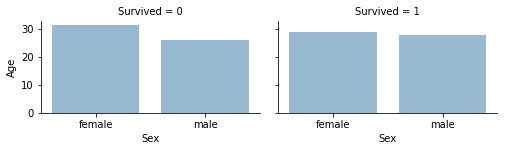

In [10]:
#
# Corrolation between Sex & Age and their impact to the survival
g=sns.FacetGrid(data,col='Survived',height=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex','Age',alpha=.5, ci=None)
g.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


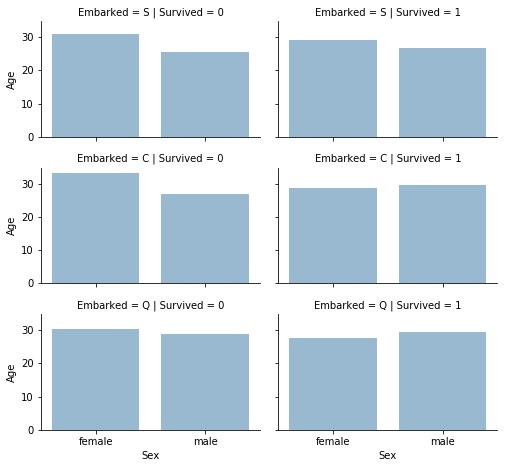

In [11]:
#
# Corrolation between Sex & Age and their impact to the survival and Embarked
g=sns.FacetGrid(data,row='Embarked',col='Survived',height=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex','Age',alpha=.5, ci=None)
g.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


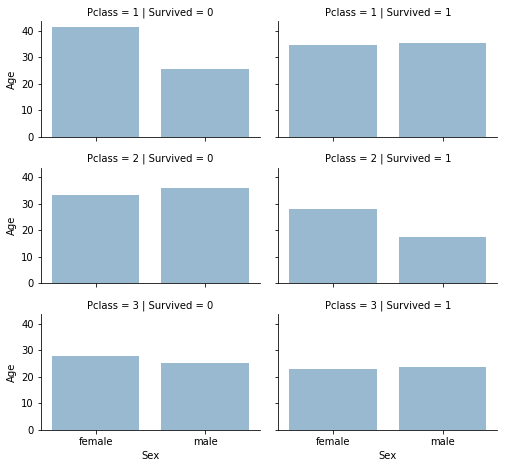

In [12]:
#
# Corrolation between Sex & Age and their impact to the survival and Class
g=sns.FacetGrid(data,row='Pclass',col='Survived',height=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex','Age',alpha=.5, ci=None)
g.add_legend()

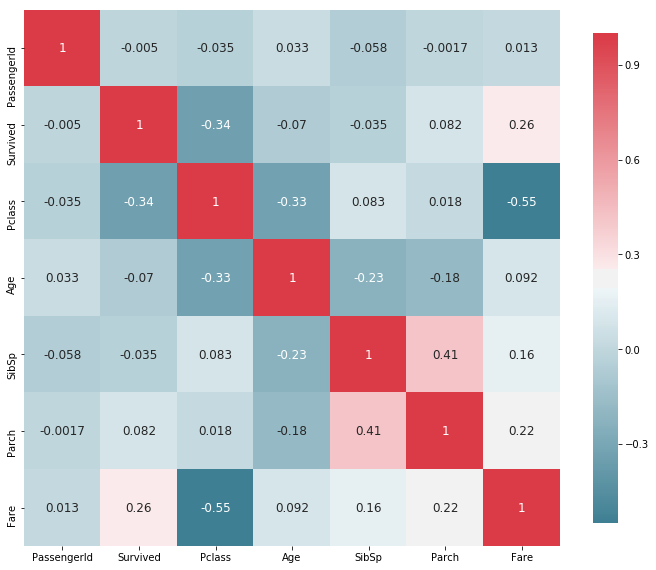

In [13]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data)
##
## Looking at this function we can quickly see that:
## The diagonal line is the correlation of the variables to themselvese. 
## A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
## - Survived is negligibly correlate to Fare & Patch,the variables are directly related. But is inversely related with SibSp, Age, Pclass and Passengerid 
## - Pclass is moderately correlate to Patch & negligibly correlate to SibSp, the variables are directly related. Is inversely Moderate related with Fare and inversely Low, Age and Survived. 
## - Age is lowly negative correlate to Pclass. 
## - Sibsp is lowly positive correlate to Parch and lowly negative correlate to Age.
## - Parch is lowly positive correlate to SibSp
## - Fare is moderately negative correlate to Pclass
## This function shows that SibSP and Parch move in the same direction.Also, Pclass and Fare move in opposite directions
##

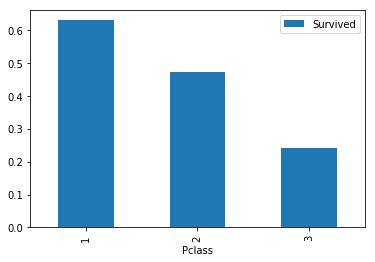

In [19]:
#
# Use the groupby function combined with the mean() to view the relation between pclass and survive
data[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().plot(kind='bar')

In [20]:
data['Title']= data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


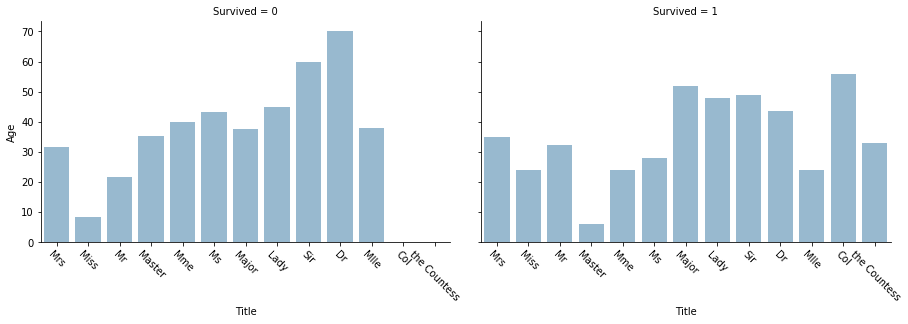

In [21]:
#
# Corrolation between Title and age and Survived
g=sns.FacetGrid(data,col='Survived',height=4, aspect=1.6)
g.map(sns.barplot, 'Title','Age',alpha=.5, ci=None)
(g.set_xticklabels(rotation=-45))

In [22]:
Title_Dictionary = {

                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }
data['Title']= data['Title'].map(Title_Dictionary)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

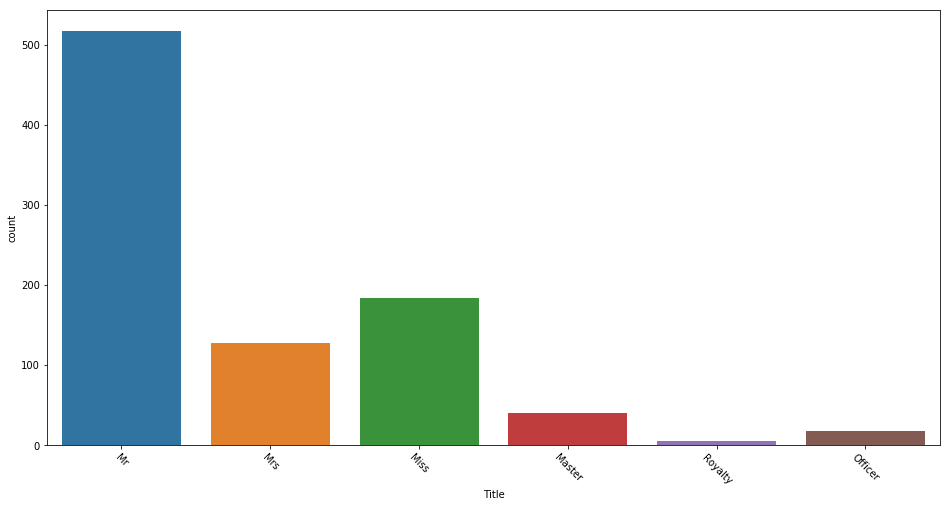

In [23]:
#
#
plt.figure(figsize=(16,8))
sns.countplot(x='Title',data=data)
plt.xticks(rotation=-45)

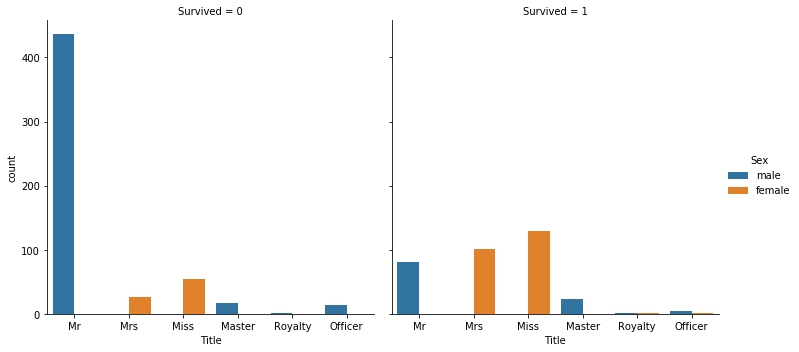

In [24]:
#
#
sns.catplot(x="Title", hue="Sex", col="Survived",
                data=data, kind="count",
                height=5, aspect=1);

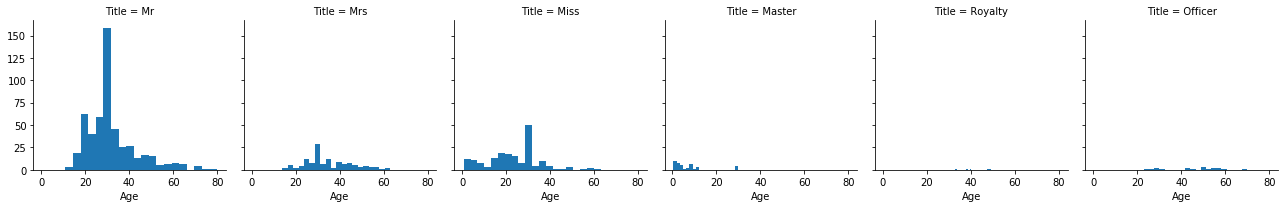

In [25]:
#
#
g=sns.FacetGrid(data,col='Title')
g.map(plt.hist,'Age', bins=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


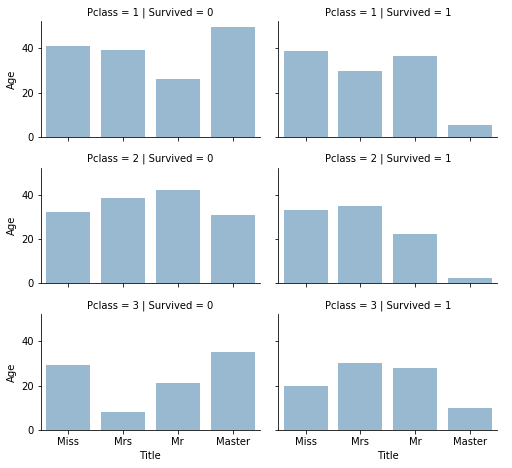

In [26]:
#
#
g=sns.FacetGrid(data,row='Pclass',col='Survived',height=2.2, aspect=1.6)
g.map(sns.barplot, 'Title','Age',alpha=.5, ci=None)
g.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


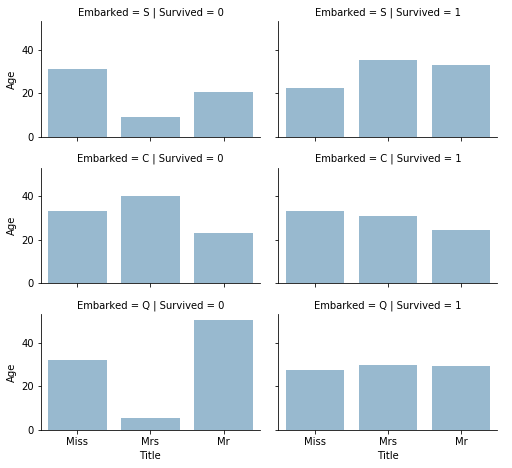

In [27]:
#
#
g=sns.FacetGrid(data,row='Embarked',col='Survived',height=2.2, aspect=1.6)
g.map(sns.barplot, 'Title','Age',alpha=.5, ci=None)
g.add_legend()

In [28]:
#
# Family Size Feature
data['Family_Size']=data['SibSp']+data['Parch']+1

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

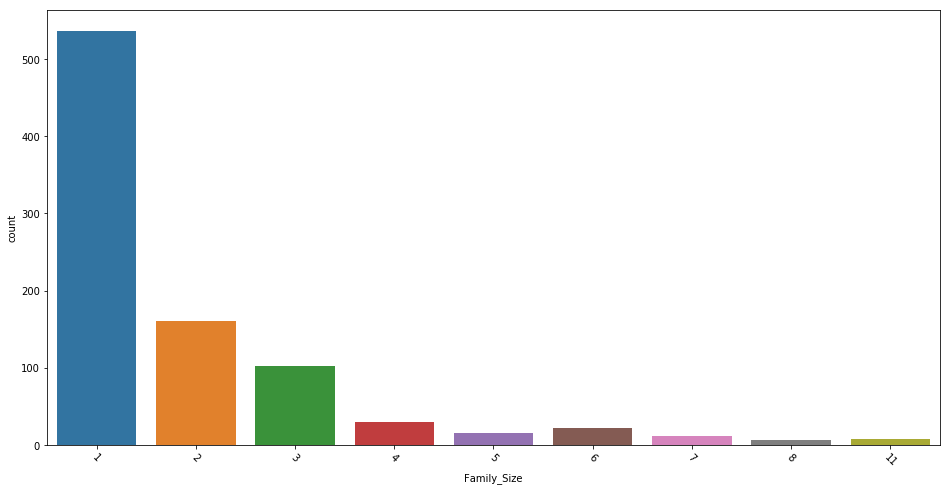

In [29]:
#
# Family Size Plot
plt.figure(figsize=(16,8))
sns.countplot(x='Family_Size',data=data)
plt.xticks(rotation=-45)

<Figure size 1152x576 with 0 Axes>

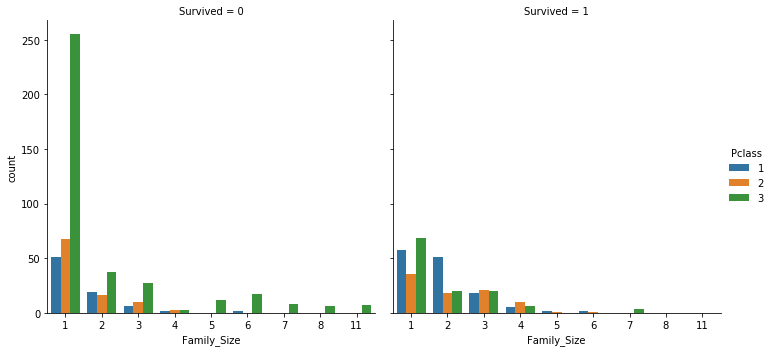

In [30]:
#
# Survived Family Size
plt.figure(figsize=(16,8))
sns.catplot(x="Family_Size", hue="Pclass", col="Survived",
                data=data, kind="count",
                height=5, aspect=1);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1152x576 with 0 Axes>

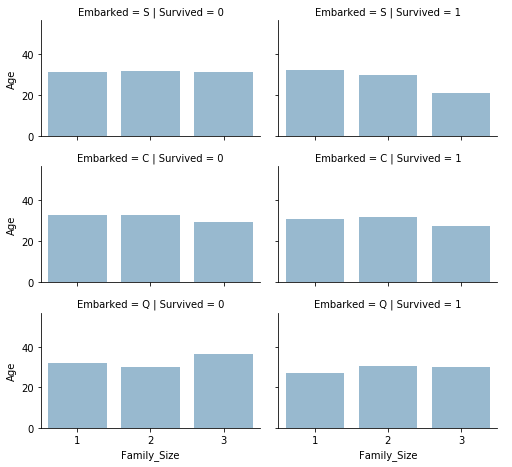

In [31]:
#
#
plt.figure(figsize=(16,8))
g=sns.FacetGrid(data,row='Embarked',col='Survived',height=2.2, aspect=1.6)
g.map(sns.barplot, 'Family_Size','Age',alpha=.5, ci=None)
g.add_legend()

In [32]:
#
# Family size by categories
data['Family_Size_1']=data['Family_Size'].map(lambda s: 1 if s == 1 else 2 if s == 2 else 3 if 3<=s<=4 else 4 if s>=5 else 0)

([<matplotlib.axis.XTick at 0x1ec38bae780>,
 <a list of 4 Text xticklabel objects>)

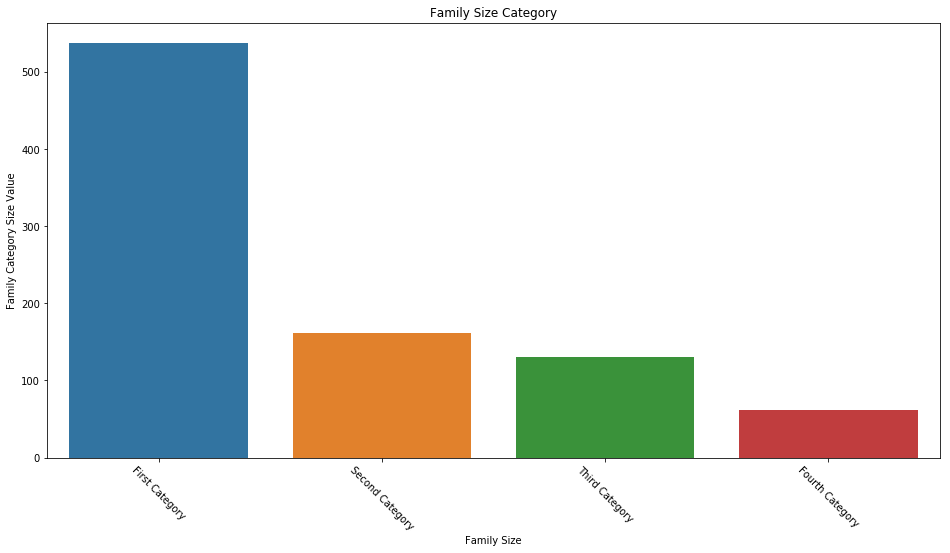

In [33]:
#
# Family Size Category Plot
plt.figure(figsize=(16,8))
sns.countplot(x='Family_Size_1',data=data)
plt.title("Family Size Category")
plt.xlabel("Family Size")
plt.ylabel("Family Category Size Value")
plt.xticks([0, 1,2,3], ['First Category', 'Second Category', 'Third Category', 'Fourth Category'],rotation=-45)

<Figure size 1152x576 with 0 Axes>

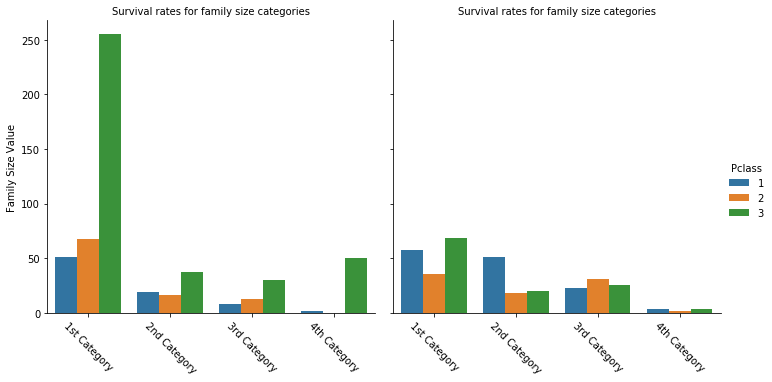

In [34]:
#
# Plot "Survival rates for family size categories"
plt.figure(figsize=(16,8))
g=sns.catplot(x="Family_Size_1", hue="Pclass", col="Survived",
                data=data, kind="count",
                height=5, aspect=1);
(g.set_axis_labels("","Family Size Value")
.set_xticklabels(["1st Category", "2nd Category", "3rd Category", "4th Category"],rotation=-45)
 .set_titles("Survival rates for family size categories"))
